In [3]:
# Dependencies
import csv
import sys
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress 
import seaborn as sns 
from scipy import stats
import matplotlib.dates as mdates
import scipy.stats as st
from pprint import pprint
from datetime import datetime

In [4]:
# Import the covid-19 dataset 
csv_path = (r'C:\Users\Cody\projectone\ucb-data-visualization-msgrp-project1-covid-19\Resources\owid-covid-data_updated_main.csv')
covid_data_df = pd.read_csv(csv_path)
covid_data_df.head(1000)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,9/28/2020,3844,12,41.857,25,0,0.286,...,35973.781,0.0,0.000,11.62,0.0,0.0,0.000,0.00,76.29,0.000
1,AFG,Asia,Afghanistan,9/28/2020,39227,0,26.143,1453,0,1.714,...,1803.987,0.0,597.029,9.59,0.0,0.0,37.746,0.50,64.83,0.498
2,AGO,Africa,Angola,9/28/2020,4672,82,97.286,171,4,2.714,...,5819.495,0.0,276.045,3.94,0.0,0.0,26.664,0.00,61.15,0.581
3,AIA,North America,Anguilla,9/28/2020,3,0,0.000,0,0,0.000,...,0.000,0.0,0.000,0.00,0.0,0.0,0.000,0.00,81.88,0.000
4,ALB,Europe,Albania,9/28/2020,13259,106,124.857,377,2,2.143,...,11803.431,1.1,304.195,10.08,7.1,51.2,0.000,2.89,78.57,0.785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,OWID_KOS,Europe,Kosovo,9/28/2020,15472,47,58.429,622,3,1.286,...,9795.834,0.6,0.000,0.00,0.0,0.0,0.000,0.00,0.00,0.000
203,YEM,Asia,Yemen,9/28/2020,2034,1,0.571,588,0,0.286,...,1479.147,18.8,495.003,5.35,7.6,29.2,49.542,0.70,66.12,0.452
204,ZAF,Africa,South Africa,9/28/2020,670766,1268,1365.000,16398,22,63.571,...,12294.876,18.9,200.380,5.52,8.1,33.2,43.993,2.32,64.13,0.699
205,ZMB,Africa,Zambia,9/28/2020,14641,29,72.857,332,0,0.286,...,3689.251,57.5,234.499,3.94,3.1,24.7,13.938,2.00,63.89,0.588


In [7]:
def linear_regress(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    
    return line_eq


The r-squared is : 0.13


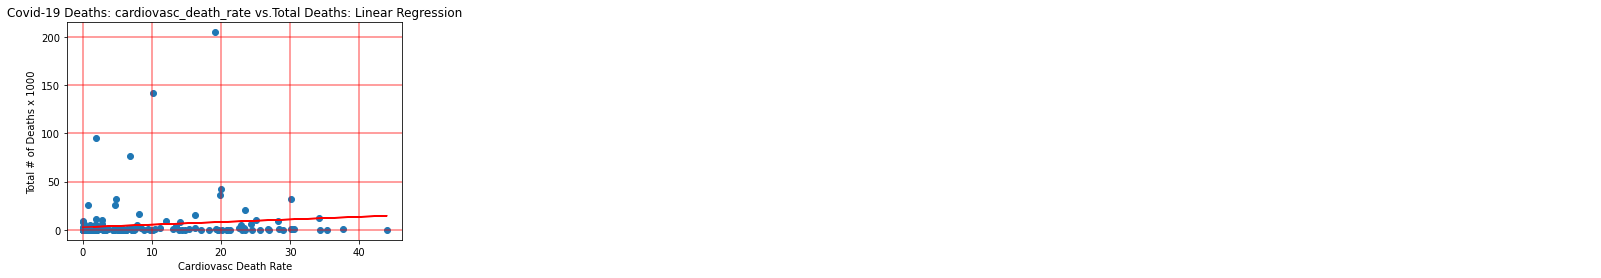

In [14]:
#Correlation of # of covid-19 death with cardiovasc_death_rate


#smokers = covid_data_df.groupby(["location"])["female_smokers"].mean() + covid_data_df.groupby(["location"])["male_smokers"].mean()

def annotate_plt(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="blue")


    # Call function 
get_regress = linear_regress(covid_data_df['female_smokers'], 
                             covid_data_df["total_deaths"]/1000)


# Call annotate func
annotate_plt(get_regress, 200, 20)

# Set a title
plt.title("Covid-19 Deaths: cardiovasc_death_rate vs.Total Deaths: Linear Regression")

# Set xlabel
plt.xlabel("Cardiovasc Death Rate")

# Set ylabel
plt.ylabel("Total # of Deaths x 1000")

# Set grid 
plt.grid(linestyle='-', linewidth=1.5, alpha = 0.5, color='r')

# Save the figure
plt.savefig("Covid-19-cardiovasc_death_rate-VS-COVID-total_deaths-LinearRegression.png")



The r-squared is : 0.03


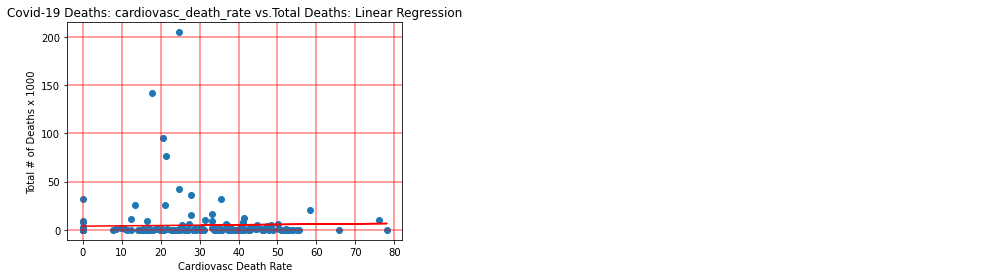

In [13]:
#Correlation of # of covid-19 death with cardiovasc_death_rate


#smokers = covid_data_df.groupby(["location"])["female_smokers"].mean() + covid_data_df.groupby(["location"])["male_smokers"].mean()

def annotate_plt(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="blue")


    # Call function 
get_regress = linear_regress(covid_data_df['male_smokers'], 
                             covid_data_df["total_deaths"]/1000)


# Call annotate func
annotate_plt(get_regress, 200, 20)

# Set a title
plt.title("Covid-19 Deaths: cardiovasc_death_rate vs.Total Deaths: Linear Regression")

# Set xlabel
plt.xlabel("Cardiovasc Death Rate")

# Set ylabel
plt.ylabel("Total # of Deaths x 1000")

# Set grid 
plt.grid(linestyle='-', linewidth=1.5, alpha = 0.5, color='r')

# Save the figure
plt.savefig("Covid-19-cardiovasc_death_rate-VS-COVID-total_deaths-LinearRegression.png")

